In [5]:
from common import *

In [6]:
# Load dataset
def gen_data():
    for exp, setting in zip(['exp01', 'exp08'], ['baseline', 'live-nym']):
        for classifier in ['DL (Drift)', 'DL (Shape)', 'Statistical']:
            respath = ROC_PATH / classifier.split()[0] / exp
            if classifier.startswith('DL'):
                respath = respath / classifier.split()[1][1:-1].lower()
            item = pd.read_csv(respath / f'subsampled_ROC_100.txt', sep=' ', names=['TPR', 'FPR'])
            item['Classifier'] = classifier
            item['Setting'] = setting
            yield item
            
data = pd.concat(gen_data()).reset_index(drop=True)

PDFCROP 1.40, 2020/06/06 - Copyright (c) 2002-2020 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `exp1vs8-crop.pdf'.


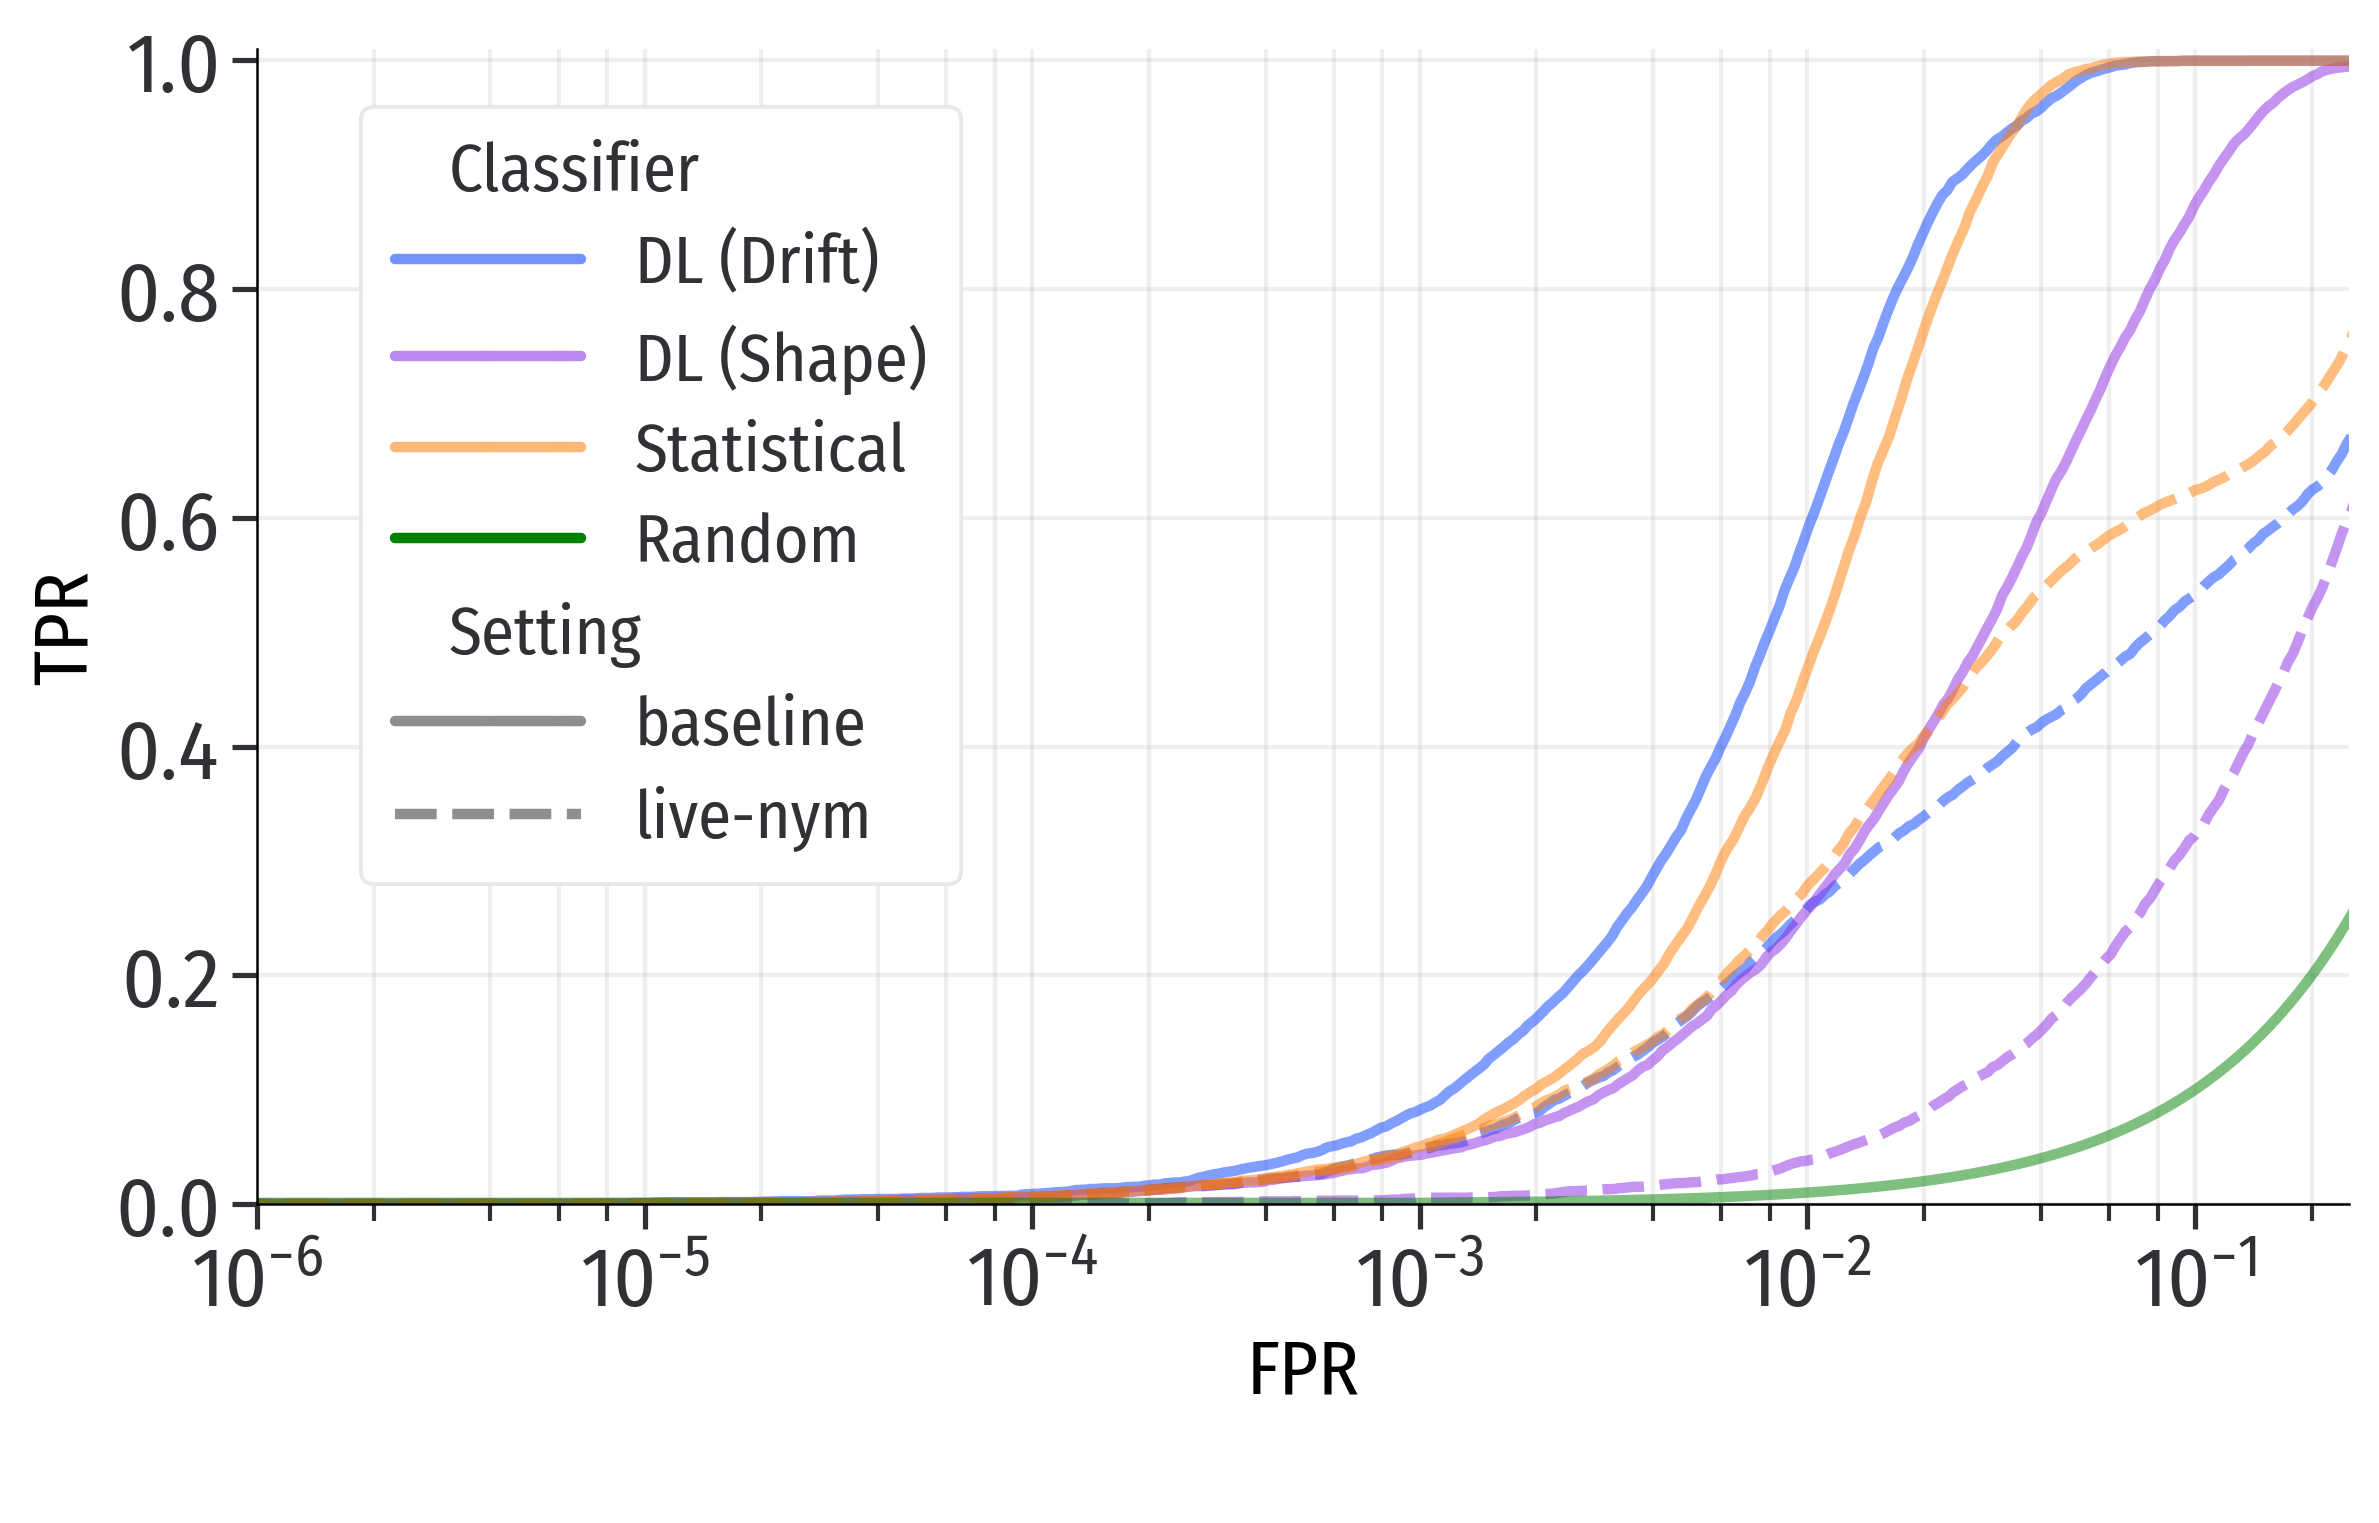

In [7]:
fig = plt.gcf()
fig.set_size_inches(SIZE_W, SIZE_H)

# show ROC
g = sns.lineplot(data=data, x='FPR', y='TPR', style='Setting', hue='Classifier', legend='full', ci=None, palette=[blue, purple, yellow])

plot_random_classifier(g)
set_log_scale(g)

# custom legend
handles, labels = g.get_legend_handles_labels()
handles.insert(4, Line2D([0],[0], color="green"))
labels.insert(4, 'Random')
windows_leg = plt.legend(handles=handles,
                         labels=labels,
                         bbox_to_anchor=(0.05, 0.95),
                         loc='upper left',
                         borderaxespad=0,
                         borderpad=0.5,
                         ncol=1)
g.add_artist(windows_leg)

# indent legend title
for vpack in windows_leg._legend_handle_box.get_children():
    vpack.get_children()[0].get_children()[0].set_width(0)
    vpack.get_children()[5].get_children()[0].set_width(0)

save_fig('exp1vs8')